##**1.Import and explore the data.**


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
df_data=pd.read_csv('/content/drive/My Drive/Corizo/signal-data.csv',delimiter=',')
df_data.head(5)

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


##**2.Data cleansing**

Missing value treatment



In [ ]:
df_data.isnull().sum()

,0
Time,0
0,6
1,7
2,14
3,14
...,...
586,1
587,1
588,1
589,1


In [ ]:
for column in df_data.columns:
  if df_data[column].isnull().any():
    df_data[column].fillna(df_data[column].mean(), inplace=True)


<ipython-input-5-39355a6a779e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_data[column].fillna(df_data[column].mean(), inplace=True)


In [ ]:
df_data.isnull().sum()

,0
Time,0
0,0
1,0
2,0
3,0
...,...
586,0
587,0
588,0
589,0


Drop attribute/s if required using relevant functional knowledge.

In [ ]:
attributes_to_drop = []

for attribute in attributes_to_drop:
    if attribute in df_data.columns:
        df_data = df_data.drop(attribute, axis=1)
    else:
        print(f"Warning: Attribute '{attribute}' not found in the DataFrame.")

df_data.head(5)


,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,97.934373,0.5005,0.0118,0.0035,2.3630,0.021458,0.016475,0.005283,99.670066,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.204500,0.5019,0.0223,0.0055,4.4447,0.009600,0.020100,0.006000,208.204500,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.860200,0.4958,0.0157,0.0039,3.1745,0.058400,0.048400,0.014800,82.860200,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.843200,0.4990,0.0103,0.0025,2.0544,0.020200,0.014900,0.004400,73.843200,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,97.934373,0.4800,0.4766,0.1045,99.3032,0.020200,0.014900,0.004400,73.843200,-1


Make all relevant modifications on the data using both functional/logical reasoning/assumptions.

In [ ]:
df_data['Time'] = pd.to_datetime(df_data['Time'])

numerical_features = df_data.select_dtypes(include=np.number)
correlation_matrix = df_data.corr()
print('correlation_matrix',correlation_matrix)



correlation_matrix                Time         0         1         2         3         4   5  \
Time       1.000000  0.007884 -0.020727 -0.040650  0.201369  0.002212 NaN   
0          0.007884  1.000000 -0.143840  0.004756 -0.007613 -0.011014 NaN   
1         -0.020727 -0.143840  1.000000  0.005767 -0.007568 -0.001636 NaN   
2         -0.040650  0.004756  0.005767  1.000000  0.298935  0.095891 NaN   
3          0.201369 -0.007613 -0.007568  0.298935  1.000000 -0.058483 NaN   
...             ...       ...       ...       ...       ...       ...  ..   
586        0.044247  0.018443 -0.009403 -0.025495  0.034711 -0.043929 NaN   
587        0.004619 -0.025880  0.017266 -0.029345 -0.039132 -0.031005 NaN   
588        0.014035 -0.028166  0.010118 -0.030818 -0.033645 -0.026100 NaN   
589        0.023308  0.004174  0.044797 -0.032890 -0.080341  0.050910 NaN   
Pass/Fail -0.020068 -0.025141 -0.002603 -0.000957 -0.024623 -0.013756 NaN   

                  6         7         8  ...       581  

In [ ]:
df_data['mean'] = df_data.mean(axis=1, numeric_only=True).astype(float)

df_data.head(5)

,Time,0,1,2,3,4,5,6,7,8,...,582,583,584,585,586,587,588,589,Pass/Fail,mean
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,0.5005,0.0118,0.0035,2.3630,0.021458,0.016475,0.005283,99.670066,-1,71.695416
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,0.5019,0.0223,0.0055,4.4447,0.009600,0.020100,0.006000,208.204500,-1,69.582618
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,0.4958,0.0157,0.0039,3.1745,0.058400,0.048400,0.014800,82.860200,1,66.431498
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,0.4990,0.0103,0.0025,2.0544,0.020200,0.014900,0.004400,73.843200,-1,72.047136
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,0.4800,0.4766,0.1045,99.3032,0.020200,0.014900,0.004400,73.843200,-1,73.279960


##**3.Data analysis & visualisation**

Perform detailed relevant statistical analysis on the data.

In [ ]:
if 'target_variable_name' in df_data.columns:
  print(df_data['target_variable_name'].value_counts())


print('skew',df_data.drop(columns=['Time']).skew())
print('Kurtosis',df_data.drop(columns=['Time']).kurtosis())
print('Mininum',df_data.drop(columns=['Time']).min())
print('Maximum',df_data.drop(columns=['Time']).max())
print(' Standard deviation',df_data.drop(columns=['Time']).std())

skew 0             0.514641
1            -0.043163
2            -0.307136
3             1.719310
4            19.733442
               ...    
587           1.948028
588           2.030018
589           2.715340
Pass/Fail     3.487359
mean          1.456290
Length: 592, dtype: float64
Kurtosis 0              1.487825
1              2.264938
2              2.352728
3              4.663267
4            387.934406
                ...    
587            7.099358
588            8.245999
589            9.818151
Pass/Fail     10.174657
mean           2.315800
Length: 592, dtype: float64
Mininum 0            2743.240000
1            2158.750000
2            2060.660000
3               0.000000
4               0.681500
                ...     
587             0.003200
588             0.001000
589             0.000000
Pass/Fail      -1.000000
mean           57.819759
Length: 592, dtype: float64
Maximum 0            3356.350000
1            2846.440000
2            2315.266700
3            3715.0

Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.

Univariate analysis for mean score of semiconductor over time and analysis pass/fail rate of data

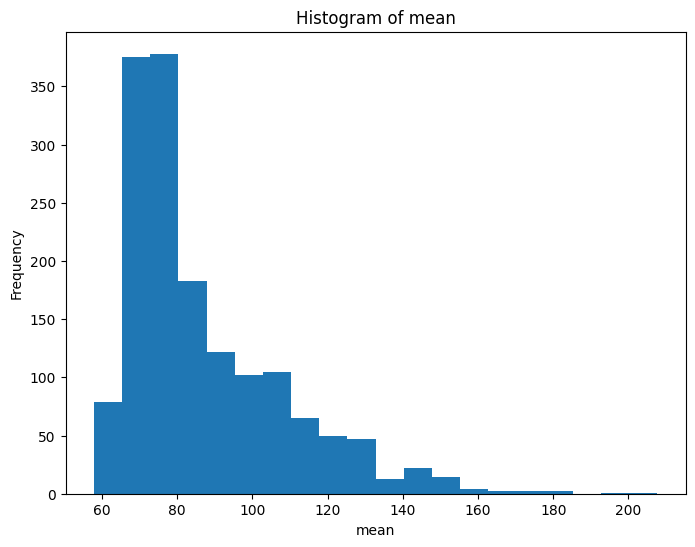

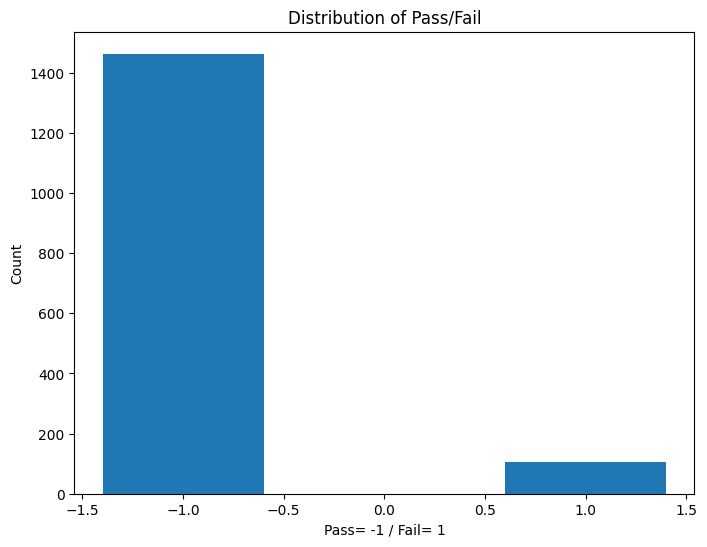

In [ ]:
columns_to_analyze = ['mean', 'Pass/Fail']


for column in columns_to_analyze:
    if column == 'Pass/Fail':

        pass_fail_counts = df_data['Pass/Fail'].value_counts()
        plt.figure(figsize=(8, 6))
        plt.bar(pass_fail_counts.index, pass_fail_counts.values)
        plt.title("Distribution of Pass/Fail")
        plt.xlabel("Pass= -1 / Fail= 1")
        plt.ylabel("Count")
        plt.show()
    else:

        plt.figure(figsize=(8, 6))
        plt.hist(df_data[column], bins=20)
        plt.title(f"Histogram of {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.show()

 bivariate analysis of mean and pass/fail over the time

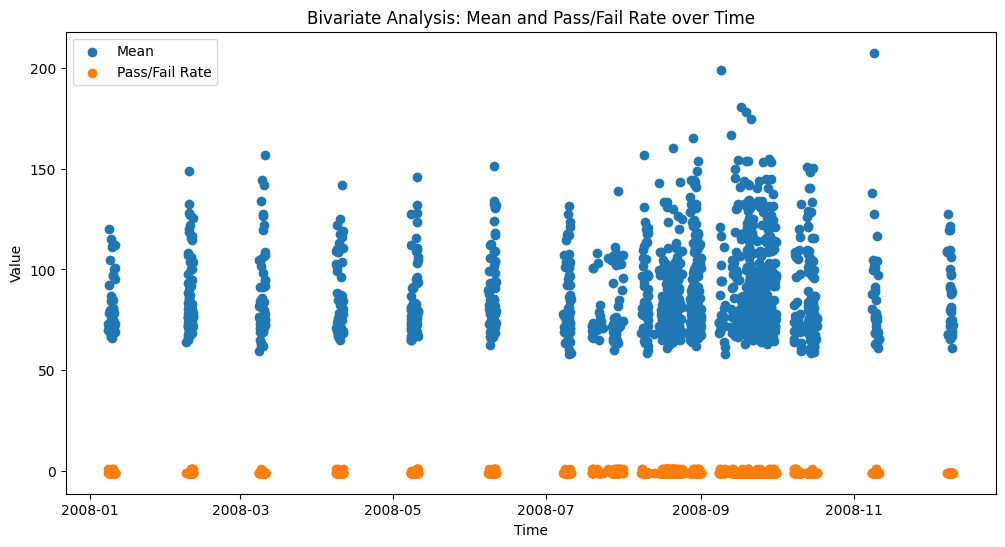

Correlation between mean and pass/fail rate: 0.008464679147917148


In [ ]:
grouped_data = df_data.groupby('Time').agg({'mean': 'mean', 'Pass/Fail': 'mean'})

plt.figure(figsize=(12, 6))
plt.scatter(grouped_data.index, grouped_data['mean'], label='Mean')
plt.scatter(grouped_data.index, grouped_data['Pass/Fail'], label='Pass/Fail Rate')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Bivariate Analysis: Mean and Pass/Fail Rate over Time')
plt.legend()
plt.show()


correlation = grouped_data['mean'].corr(grouped_data['Pass/Fail'])
print(f"Correlation between mean and pass/fail rate: {correlation}")



multivariate analysis of mean and pass/fail over the time

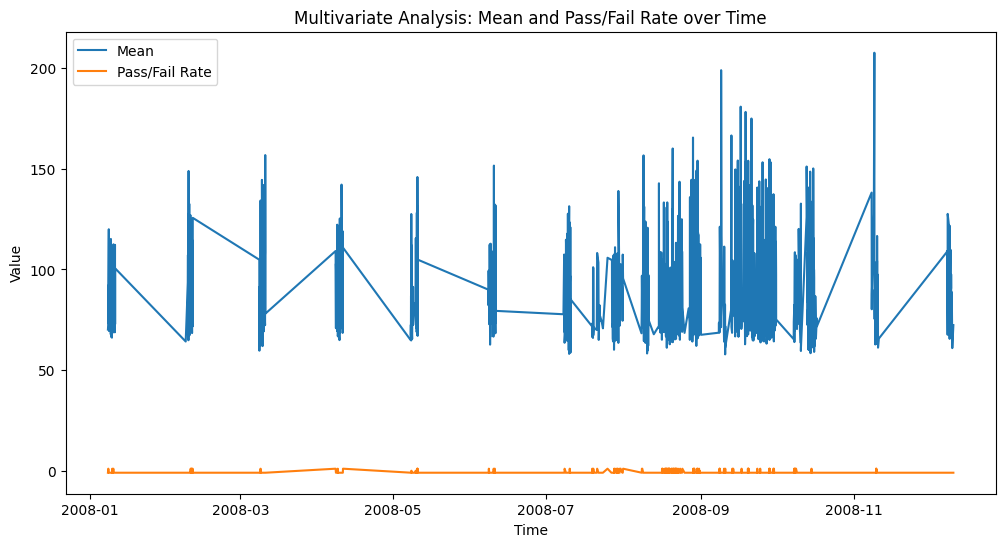

In [ ]:
pivot_table = pd.pivot_table(df_data, values=['mean', 'Pass/Fail'], index='Time', aggfunc='mean')

plt.figure(figsize=(12, 6))
plt.plot(pivot_table.index, pivot_table['mean'], label='Mean')
plt.plot(pivot_table.index, pivot_table['Pass/Fail'], label='Pass/Fail Rate')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Multivariate Analysis: Mean and Pass/Fail Rate over Time')
plt.legend()
plt.show()



## **4.Data pre-processing**

Segregate predictors vs target attributes

In [ ]:
X = df_data.drop('Pass/Fail', axis=1)
y = df_data['Pass/Fail']


if 'Time' in X.columns:
  X = X.drop('Time', axis=1)


Check for target balancing and fix it if found imbalanced (read SMOTE)

In [ ]:
class_counts = y.value_counts()
print("Class Distribution:", class_counts)

if len(class_counts) > 1 and (class_counts.max() / class_counts.sum()) > 0.8:
    print("Target variable is imbalanced. Applying SMOTE...")


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    print("Resampled Class Distribution:", y_train_resampled.value_counts())

else:
    print("Target variable is not significantly imbalanced. Proceeding without SMOTE.")


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Class Distribution: Pass/Fail
-1    1463
 1     104
Name: count, dtype: int64
Target variable is imbalanced. Applying SMOTE...
Resampled Class Distribution: Pass/Fail
-1    1173
 1    1173
Name: count, dtype: int64


 Perform train-test split and standardise the data or vice versa if required.

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Check if the train and test data have similar statistical characteristics when compared
with original data.

In [ ]:
print("Original Data Statistics:")
print("Mean:", df_data.drop(columns=['Time']).mean())
print("Standard Deviation:", df_data.drop(columns=['Time']).std())

print("\nTraining Data Statistics:")
print("Mean:", pd.DataFrame(X_train).mean())
print("Standard Deviation:", pd.DataFrame(X_train).std())

print("\nTesting Data Statistics:")
print("Mean:", pd.DataFrame(X_test).mean())
print("Standard Deviation:", pd.DataFrame(X_test).std())


Original Data Statistics:
Mean: 0            3014.452896
1            2495.850231
2            2200.547318
3            1396.376627
4               4.197013
                ...     
587             0.016475
588             0.005283
589            99.670066
Pass/Fail      -0.867262
mean           87.060948
Length: 592, dtype: float64
Standard Deviation: 0             73.480613
1             80.227793
2             29.380932
3            439.712852
4             56.103066
                ...    
587            0.008805
588            0.002866
589           93.861936
Pass/Fail      0.498010
mean          21.310147
Length: 592, dtype: float64

Training Data Statistics:
Mean: 0      5.670732e-18
1     -1.701220e-17
2      5.670732e-18
3     -1.134146e-17
4      2.835366e-18
           ...     
586    6.379574e-18
587   -2.835366e-17
588    0.000000e+00
589   -5.670732e-18
590    1.559451e-17
Length: 591, dtype: float64
Standard Deviation: 0      1.000399
1      1.000399
2      1.000399
3   

## **5. Model training, testing and tuning**

Model training

In [ ]:
models = {
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB()
}


param_grids = {
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    "SVM": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    "Naive Bayes": {

    }
}


for model_name, model in models.items():
    print(f"\nTraining {model_name}...")


    if model_name in param_grids:
        grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, scoring='accuracy')
        grid_search.fit(X_train, y_train)

        best_params = grid_search.best_params_
        best_score = grid_search.best_score_
        print(f"Best parameters: {best_params}")
        print(f"Best cross-validation accuracy: {best_score}")


        best_model = model.set_params(**best_params)
        best_model.fit(X_train, y_train)
    else:
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
        print(f"Cross-validation accuracy: {np.mean(cv_scores)}")
        best_model = model.fit(X_train, y_train)


    y_pred = best_model.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"Test Accuracy: {accuracy}")
    print("Classification Report:")
report



Training Random Forest...
Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validation accuracy: 0.9369498007968128


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Test Accuracy: 0.9235668789808917
Classification Report:

Training SVM...
Best parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation accuracy: 0.9361529880478088
Test Accuracy: 0.9235668789808917
Classification Report:

Training Naive Bayes...
Best parameters: {}
Best cross-validation accuracy: 0.237003984063745
Test Accuracy: 0.21656050955414013
Classification Report:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


'              precision    recall  f1-score   support\n\n          -1       0.94      0.16      0.28       290\n           1       0.08      0.88      0.15        24\n\n    accuracy                           0.22       314\n   macro avg       0.51      0.52      0.21       314\nweighted avg       0.87      0.22      0.27       314\n'

 Display and compare all the models designed with their train and test accuracies

In [ ]:
results = []
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")

    if model_name in param_grids:
        grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, scoring='accuracy')
        grid_search.fit(X_train, y_train)

        best_params = grid_search.best_params_
        best_score = grid_search.best_score_
        print(f"Best parameters: {best_params}")
        print(f"Best cross-validation accuracy: {best_score}")

        best_model = model.set_params(**best_params)
        best_model.fit(X_train, y_train)
    else:
        best_model = model.fit(X_train, y_train)
        best_score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
        print(f"Cross-validation accuracy: {best_score}")


    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    results.append({
        'Model': model_name,
        'Train Accuracy': best_score,
        'Test Accuracy': accuracy
    })

df_results = pd.DataFrame(results)
print("\nModel Comparison:")
df_results



Training Random Forest...
Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validation accuracy: 0.9361529880478088

Training SVM...
Best parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation accuracy: 0.9361529880478088

Training Naive Bayes...
Best parameters: {}
Best cross-validation accuracy: 0.237003984063745

Model Comparison:


,Model,Train Accuracy,Test Accuracy
0,Random Forest,0.936153,0.923567
1,SVM,0.936153,0.923567
2,Naive Bayes,0.237004,0.216561


Select the final best trained model along with your detailed comments for selecting
this model.

In [ ]:
best_model_name = df_results.loc[df_results['Test Accuracy'].idxmax(), 'Model']
best_model_test_accuracy = df_results.loc[df_results['Test Accuracy'].idxmax(), 'Test Accuracy']

print(f"\nThe best model is: {best_model_name} with a test accuracy of {best_model_test_accuracy:.4f}")





The best model is: Random Forest with a test accuracy of 0.9236


 Save the selected model for future use

In [ ]:
import pickle

if 'best_model' in locals():
  filename = 'trained_model.sav'
  pickle.dump(best_model, open(filename, 'wb'))
  print(f"Model saved to {filename}")
else:
  print("Warning: 'best_model' variable not found. Please ensure you have trained a model before saving it.")


Model saved to trained_model.sav


##**6. Conclusion and improvisation**

The goals of creating a classification model to forecast the Pass/Fail yield in a semiconductor manufacturing process have been effectively met. Important conclusions include:

Suggestions and Upcoming Projects
The following actions are advised in order to improve the model's outcomes and applicability even more:

This project showed how machine learning can be used to predict results and identify important factors in a complex manufacturing environment. Building on these discoveries could lead to even higher production efficiency and cost reductions for semiconductors.